<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Logistic Regression</strong></h1>

# ✴️ Importing Necessary Libraries
****

In [1]:
import sys
!{sys.executable} -m pip -q install missingno
!{sys.executable} -m pip -q install category_encoders

# import libraries which are pandas and numpy
import pandas as pd
import numpy as np
import missingno as msno


#for plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= 15,10

#Libraries for plotting
# Modules for data visualization
import seaborn as sns
# import missingno as msno
import matplotlib.patches as mpatches
sns.set_theme(style="ticks", color_codes=True) #set theme in seaborn
# scatter matrix library
from pandas.plotting import scatter_matrix
#set to show all columns
pd.set_option('display.max_columns', None)

#Libraries for feature scaling
from sklearn.preprocessing import StandardScaler

#Libraries for Validation
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Libraries for Training model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

You should consider upgrading via the '/Users/taa/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/taa/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.20.3
Pandas version:  1.3.5
Python 2.7.18


# 📲 Data Retrieving
****

In [3]:
#Import data using functions of pandas
#Inside pandas.read_csv() method skipinitialspace parameter is use to skip initial space present in the dataframe. 
#By default, it is False, so skipinitialspace must be True to skip the whitespace.
#data is imported by "read_csv() function of pandas"
df = pd.read_csv("Data/nbaRookies.csv", delimiter=',', skipinitialspace = True)

df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

# drop Unnamed, it is just a number given to identify each house
df.head(3)

The shape of the ORGINAL data is (row, column): (1340, 21)


,Name,GP,MIN,PTS,FGM,FGA,FG%,3PMade,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0


# 📲 Data Information
****

In [4]:
print ("The shape of the data set before dropping duplicated:"+ str(df.shape))

df = df.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(df.shape))

print (df.info())

The shape of the data set before dropping duplicated:(1340, 21)
The shape of the data set after dropping duplicated:(1328, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1328 non-null   object 
 1   GP           1328 non-null   int64  
 2   MIN          1328 non-null   float64
 3   PTS          1328 non-null   float64
 4   FGM          1328 non-null   float64
 5   FGA          1328 non-null   float64
 6   FG%          1328 non-null   float64
 7   3PMade       1328 non-null   float64
 8   3PA          1328 non-null   float64
 9   3P%          1318 non-null   float64
 10  FTM          1328 non-null   float64
 11  FTA          1328 non-null   float64
 12  FT%          1328 non-null   float64
 13  OREB         1328 non-null   float64
 14  DREB         1328 non-null   float64
 15  REB          1328 non-null   float64
 16  AST  

# ❌ Rename columns
***

In [5]:
df.rename(columns={"FG%": "FG", "3P%": "P_3", "FT%": "FT"}, inplace=True)

# 🕵️ Check contents:

In [6]:
# import libraries general libraries
import pandas as pd
import numpy as np

# Modules for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import os

from scipy.stats import kurtosis, skew



def profile_summary(dataset, plot=False):

    pf = pd.DataFrame({'Attribute': "",
                       'Type': "",
                       'Num. Missing Values': [],
                       'Num. Unique Values': [],
                       'Sknewness': [],
                       'Kurtosis': []
                       })

    rows = []

    for attribute in list(dataset.select_dtypes(include=[
            np.number]).columns.values):

        att_type = dataset[attribute].dtype

        unique_values = pd.unique(dataset[attribute])

        num_missing = sum(pd.isnull(dataset[attribute]))

        sk = skew(dataset[attribute].values, axis=None, nan_policy='omit')

        ct = kurtosis(dataset[attribute].values, axis=None, nan_policy='omit')

        row = [attribute, att_type, num_missing, len(unique_values), sk, ct]

        rows.append(row)

    for attribute in list(dataset.select_dtypes(exclude=[
            np.number]).columns.values):

        att_type = dataset[attribute].dtype

        unique_values = pd.unique(dataset[attribute])

        num_missing = sum(pd.isnull(dataset[attribute]))

        sk = "N/A"

        ct = "N/A"

        row = [attribute, att_type, num_missing, len(unique_values), sk, ct]

        rows.append(row)

    for row in rows:

        pf.loc[len(pf)] = row

        if plot:

            print("Frequency plot per attribute")

            for attribute in dataset.columns:

                unique_values = pd.unique(dataset[attribute])

                num_missing = sum(pd.isnull(dataset[attribute]))

                print('Attribute: %s\nNumber of unique values: %d\nNumber '
                      'of missing values: '
                      '%d\nUnique values:' %
                      (attribute, len(unique_values), num_missing))

                print('\nFrequency plot:\n')

                d = (pd.DataFrame(dataset[attribute].value_counts()))

                ax = sns.barplot(x="index", y=attribute,
                                 data=(d).reset_index())

                ax.set(xlabel=attribute, ylabel='count')

                ax.grid(b=True, which='major', color='w', linewidth=1.0)

                ax.set_xticklabels(
                    labels=d.sort_index().index.values, rotation=90)

                plt.show()

    print("Profiling datasets")

    print(pf.to_string())
    
profile_summary(df)

Profiling datasets
      Attribute     Type  Num. Missing Values  Num. Unique Values            Sknewness   Kurtosis
0            GP    int64                  0.0                70.0            -0.477023  -0.779971
1           MIN  float64                  0.0               325.0              0.63031  -0.431346
2           PTS  float64                  0.0               191.0             1.387131   1.909988
3           FGM  float64                  0.0                87.0             1.342535   1.704801
4           FGA  float64                  0.0               159.0             1.297148   1.372682
5            FG  float64                  0.0               284.0             0.210373   0.634465
6        3PMade  float64                  0.0                23.0             2.032943   4.265977
7           3PA  float64                  0.0                54.0             1.816756   3.290015
8           P_3  float64                 10.0               255.0  0.29067877945884124   0.317606
9

In [7]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG,3PMade,3PA,P_3,FTM,FTA,FT,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.00000,1318.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,60.411145,17.634413,6.804217,2.630271,5.885542,44.184639,0.247741,0.77869,19.322989,1.298117,1.822139,70.325226,1.009714,2.027636,3.036446,1.551205,0.619051,0.368675,1.193599,0.620482
std,17.416688,8.322560,4.361669,1.684918,3.595394,6.132759,0.384548,1.06351,16.045404,0.987329,1.322653,10.562158,0.777551,1.362236,2.060241,1.475731,0.410972,0.429680,0.723966,0.485450
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.00000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.30000,22.450000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.12500,32.575000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.50000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


Text(0.5, 1, 'Box-Plot Distribution')

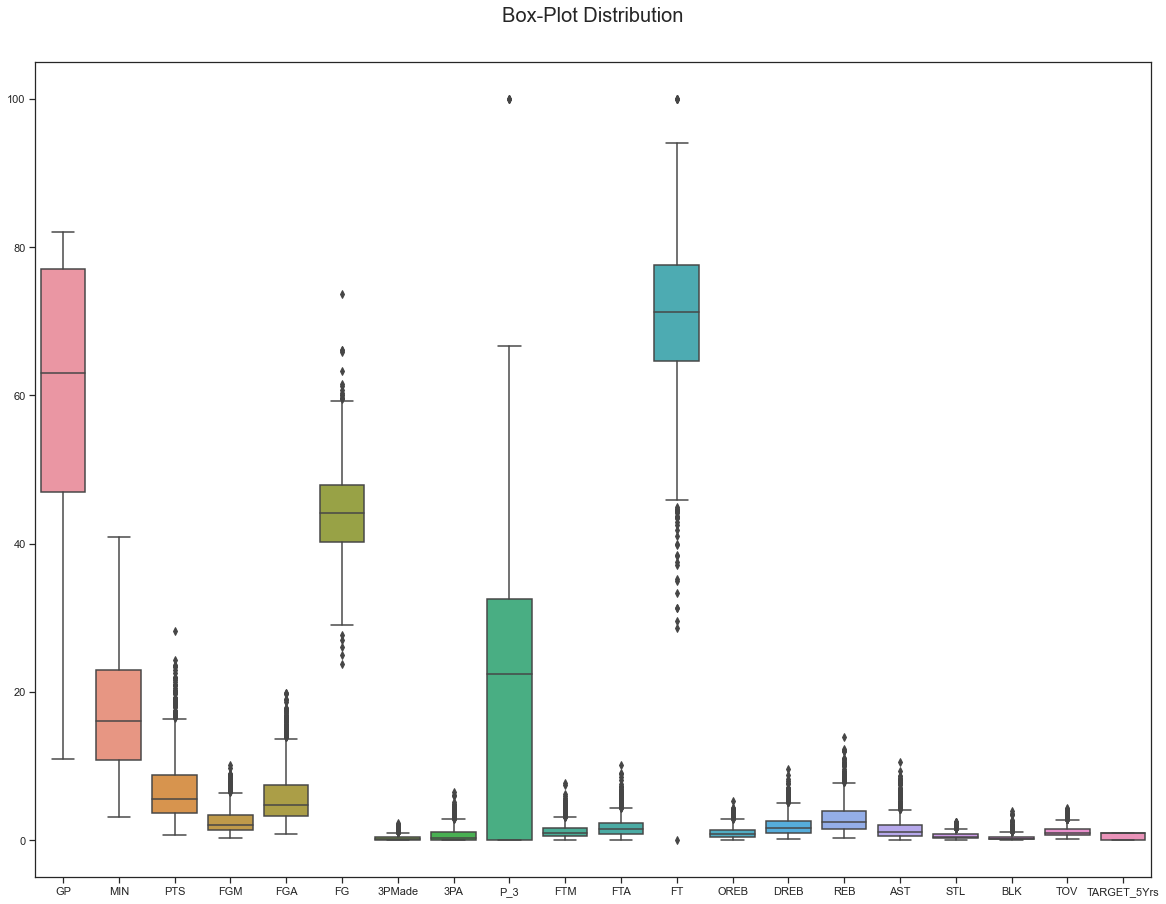

In [8]:
plt.rcParams['figure.figsize'] = [20, 15]
#Plot the box plot to sea outlier
sns.boxplot(data=df,orient="v")
plt.title("Box-Plot Distribution", y = 1,fontsize=20,pad = 40)

# ❌ Drop column
***

In [9]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# # visualize where the missing values are located
# msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
# pink_patch = mpatches.Patch(color='pink', label='present value')
# white_patch = mpatches.Patch(color='white', label='absent value')
# plt.legend(handles=[pink_patch, white_patch])
# plt.show()

Missing values in the dataframe in descending: 
      Total  Percent
P_3     10     0.75


### ---------> OBSERVATION
***
I still want to fill it, not need to drop.

In [10]:
df[df.P_3.isnull()]

,Name,GP,MIN,PTS,FGM,FGA,FG,3PMade,3PA,P_3,FTM,FTA,FT,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0
559,Jeff Wilkins,56,18.9,4.7,2.1,4.6,45.0,0.0,0.0,NaN,0.5,0.7,67.5,1.1,3.8,4.9,0.7,0.6,0.8,1.1,1.0


### ---------> OBSERVATION
***
I just want to fill na with 0.

In [11]:
df['P_3'] = df['P_3'].fillna(0)

# ⛏ Drop multi-correlation

/var/folders/96/wmt290n913j_rbbqc53kqpc14vkl89/T/ipykernel_72030/95364943.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


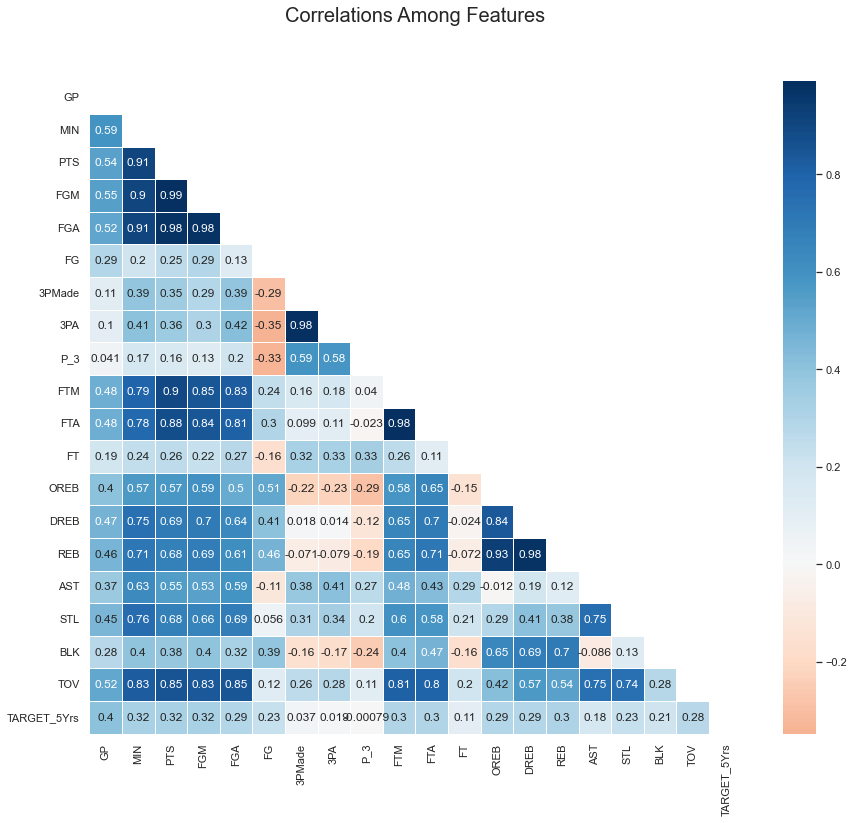

In [12]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [13]:
df = df.drop(columns=['MIN', 'PTS', 'REB', 'FGM', 'FTM', 'TOV', 'FGA', 'OREB', '3PMade'])

In [14]:
# ## heatmeap to see the correlation between features. 
# # Generate a mask for the upper triangle (taken from seaborn example gallery)
# import numpy as np
# mask = np.zeros_like(df1.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# sns.set_style('whitegrid')
# plt.subplots(figsize = (15,12))
# sns.heatmap(df1.corr(), 
#             annot=True,
#             mask = mask,
#             cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
#             linewidths=.9, 
#             linecolor='white',
#             fmt='.2g',
#             center = 0,
#             square=True)
# plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

# Encoding
****

In [15]:
import category_encoders as ce

#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['Name'],return_df=True)

#Fit and Transform Data 
df=encoder.fit_transform(df) 
df

,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Name_8,Name_9,Name_10,GP,FG,3PA,P_3,FTA,FT,DREB,AST,STL,BLK,TARGET_5Yrs
0,0,0,0,0,0,0,0,0,0,0,1,36,34.7,2.1,25.0,2.3,69.9,3.4,1.9,0.4,0.4,0.0
1,0,0,0,0,0,0,0,0,0,1,0,35,29.6,2.8,23.5,3.4,76.5,2.0,3.7,1.1,0.5,0.0
2,0,0,0,0,0,0,0,0,0,1,1,74,42.2,1.7,24.4,1.3,67.0,1.7,1.0,0.5,0.3,0.0
3,0,0,0,0,0,0,0,0,1,0,0,58,42.6,0.5,22.6,1.3,68.9,0.9,0.8,0.6,0.1,1.0
4,0,0,0,0,0,0,0,0,1,0,1,48,52.4,0.1,0.0,1.9,67.4,1.5,0.3,0.3,0.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1,0,1,0,0,0,0,1,0,1,0,80,43.3,0.2,14.3,1.5,79.2,0.8,2.5,0.6,0.2,0.0
1336,1,0,1,0,0,0,0,1,0,1,1,68,35.8,0.7,16.7,1.0,79.4,1.1,2.3,0.8,0.0,1.0
1337,1,0,1,0,0,0,0,1,1,0,0,43,55.0,0.0,0.0,1.6,64.3,2.3,0.3,0.3,0.4,0.0
1338,1,0,1,0,0,0,0,1,1,0,1,52,43.9,0.2,10.0,1.8,62.5,0.4,2.2,0.4,0.1,1.0


# 🛠 Feature Engineering

## Splitting the training data

In [16]:
#Target variable in y
y = df["TARGET_5Yrs"]

# separating our independent and dependent variable
X = df.drop(['TARGET_5Yrs'], axis = 1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .25, random_state=42)

print("Length of X_train: " + str(len(X_train)))
print("Length of X_test: " + str(len(X_test)))

Length of X_train: 996
Length of X_test: 332


## 📏 Feature Scaling

In [18]:
# Feature Scaling
## We will be using standardscaler to transform

st_scale = StandardScaler()

## transforming "train_x"
X_train = st_scale.fit_transform(X_train)
## transforming "test_x"
X_test = st_scale.fit_transform(X_test)

# Class Imbalancing
***

In [19]:
df['TARGET_5Yrs'].value_counts()

1.0    824
0.0    504
Name: TARGET_5Yrs, dtype: int64

In [20]:
df['TARGET_5Yrs'].value_counts(normalize=True, dropna=False)

1.0    0.620482
0.0    0.379518
Name: TARGET_5Yrs, dtype: float64

# Model Training
***
- C specifies the amount of weighting placed on minimising the error. The standard implementation of logistic regression in Scikit learn includes regularisation, something to prevent overfitting. But as we haven’t learnt it yet, we don’t use regularisation by setting C to a large value, which effectively negates the regularisation. 
- The max_iter is the maximum number of iterations to fit parameters to the model. Although typically not a parameter that we tune too much, to demonstrate how parameter tuning works we will try various settings of max_iter to find the best setting (for the data).



In [21]:
#Initialise the logistic model
logRegNba = LogisticRegression(C=10000, max_iter=100, solver='liblinear')


## Fit the model with "train_x" and "train_y"
logRegNba.fit(X_train,y_train)

## Use the "X_test" to predict the model outcome -> evaluate the outcome of model.
y_pred = logRegNba.predict(X_test)
y_pred_train = logRegNba.predict(X_train)


# Model Validation
***
> I use F1 score, accuracy score.

In [28]:
from sklearn.metrics import f1_score, accuracy_score
print("F1 Score:" + str(f1_score(y_test, y_pred)))
print("Accuracy Score:" + str(accuracy_score (y_test, y_pred)))
print("--------------------------------------------------------")
print("Train Accuracy Score:" + str(f1_score (y_train, y_pred_train)))
print("Train Accuracy Score:" + str(accuracy_score (y_train, y_pred_train)))

F1 Score:0.8018018018018018
Accuracy Score:0.7349397590361446
--------------------------------------------------------
Train Accuracy Score:0.7744945567651633
Train Accuracy Score:0.7088353413654619


In [23]:
sc = st_scale

## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.73493976 0.71084337 0.69277108 0.69879518 0.70481928 0.69879518
 0.71385542 0.7439759  0.71987952 0.68674699]
Mean Cross-Validation accuracy score: 0.71054


# Parameter Tuning
*****

In [24]:
lMaxIter = [100,250,1000,10000]
lF1Score = []
lAccuracyScore = []

In [25]:
for maxIter in lMaxIter:
    currLogRegNba = LogisticRegression(C=1, max_iter=maxIter)
    currLogRegNba.fit(X_train,y_train)
    currPred = currLogRegNba.predict(X_test)
    lF1Score.append(f1_score(y_test, currPred))
    lAccuracyScore.append(accuracy_score(y_test, currPred))

[0.8026905829596412, 0.8026905829596412, 0.8026905829596412, 0.8026905829596412]
[0.7349397590361446, 0.7349397590361446, 0.7349397590361446, 0.7349397590361446]


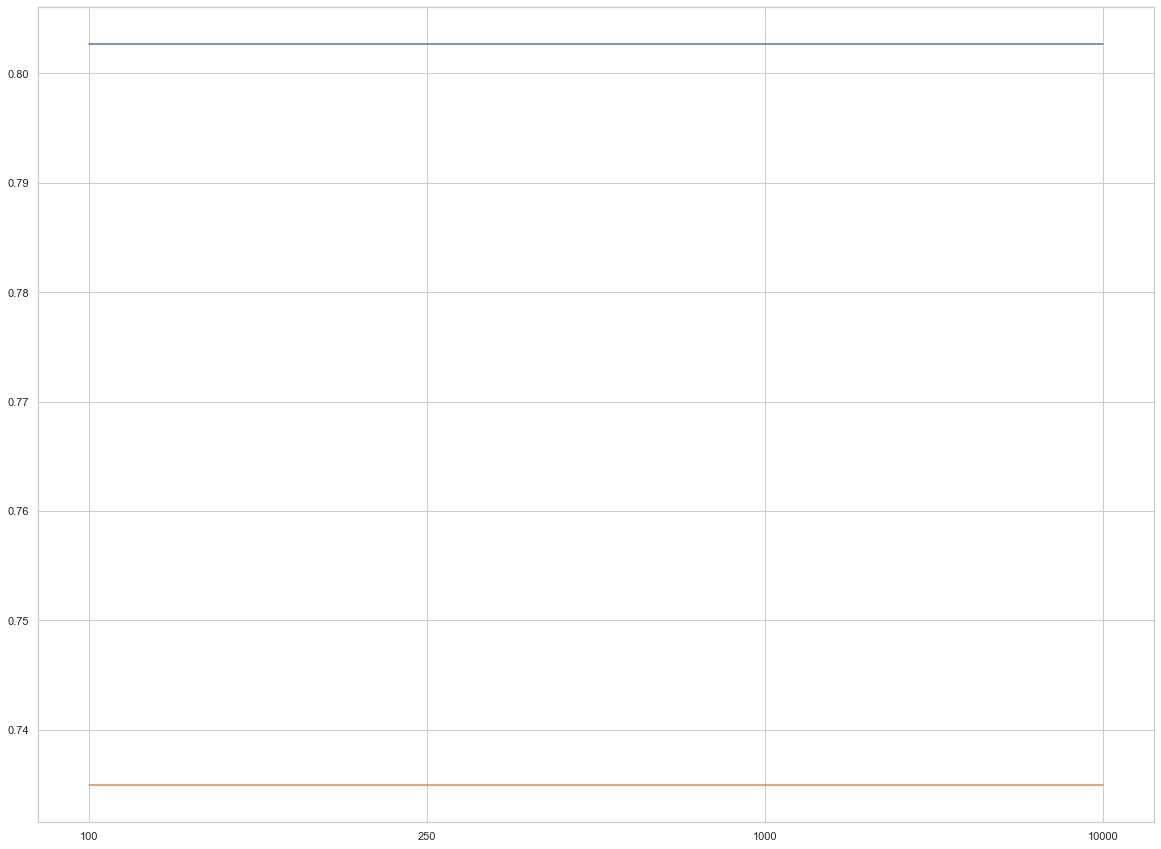

In [26]:
print(lF1Score)
print(lAccuracyScore)
plt.figure()
plt.plot(lF1Score)
plt.plot(lAccuracyScore)
plt.xticks(range(4),lMaxIter)
plt.show()

[0.8026905829596412, 0.8026905829596412]
[0.7349397590361446, 0.7349397590361446]


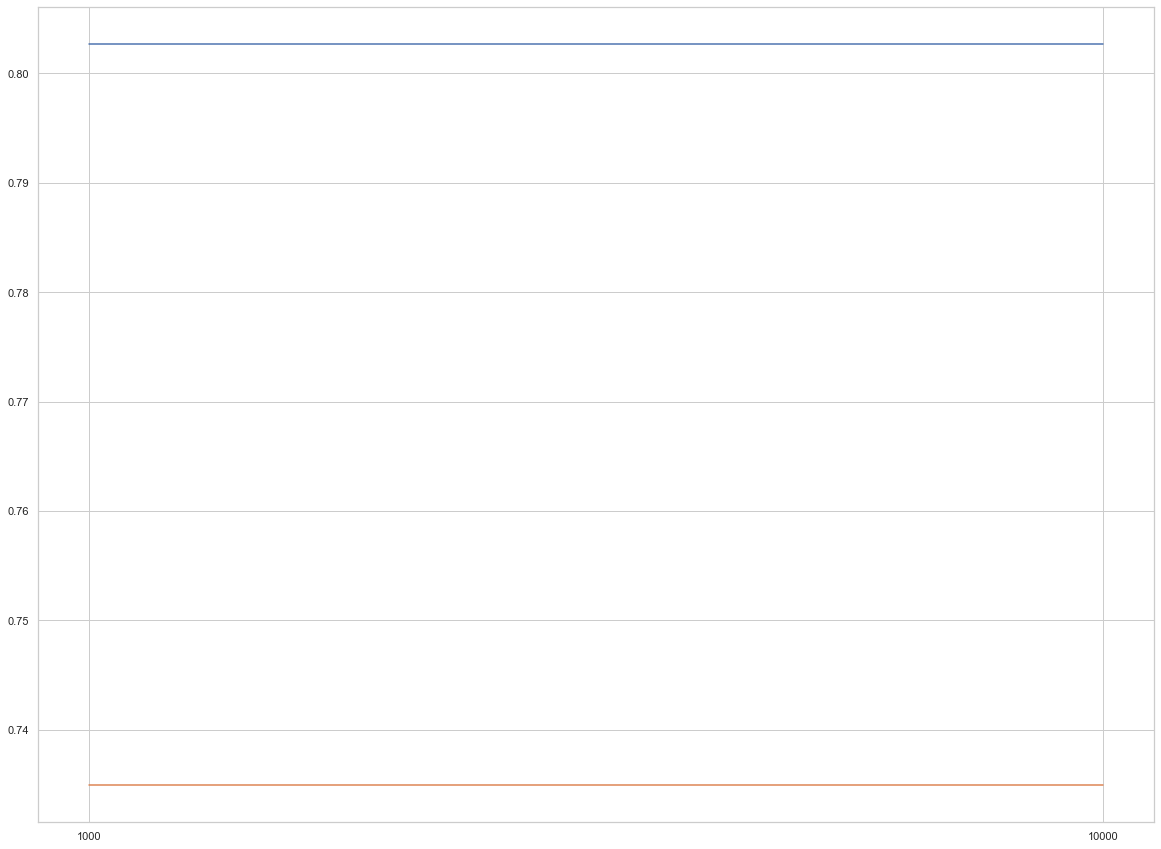

In [27]:
lMaxIter = [1000,10000]
lF1Score = []
lAccuracyScore = []


for maxIter in lMaxIter:
    currLogRegNba = LogisticRegression(C=1, max_iter=maxIter)
    currLogRegNba.fit(X_train,y_train)
    currPred = currLogRegNba.predict(X_test)
    lF1Score.append(f1_score(y_test, currPred))
    lAccuracyScore.append(accuracy_score(y_test, currPred))
    
    
print(lF1Score)
print(lAccuracyScore)
plt.figure()
plt.plot(lF1Score)
plt.plot(lAccuracyScore)
plt.xticks(range(2),lMaxIter)
plt.show()